In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [61]:
from keras.utils import np_utils
# Преобразуем метки в категории
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [62]:
Y_train.shape

(60000, 10)

In [63]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [64]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [65]:
X_train_reshaped.shape

(60000, 784)

In [66]:
def create_model(init):
    model = Sequential()
    model.add(Dense(100, input_shape=(28*28,), kernel_initializer=init, activation='tanh'))
    model.add(Dense(100, kernel_initializer=init, activation='tanh'))
    model.add(Dropout(0.25))
    model.add(Dense(100, kernel_initializer=init, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(100, kernel_initializer=init, activation='tanh'))
    model.add(Dense(10, kernel_initializer=init, activation='softmax'))
    
    return model

In [67]:
#niform_model = create_model("uniform")
uniform_model = create_model("glorot_normal")

In [69]:
uniform_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
uniform_model.fit(X_train, Y_train, batch_size=200, epochs=100, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0055 - acc: 0.9982 - val_loss: 0.1635 - val_acc: 0.9758
Epoch 2/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0056 - acc: 0.9984 - val_loss: 0.1499 - val_acc: 0.9776
Epoch 3/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0051 - acc: 0.9983 - val_loss: 0.1490 - val_acc: 0.9784
Epoch 4/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0068 - acc: 0.9981 - val_loss: 0.1458 - val_acc: 0.9789
Epoch 5/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0050 - acc: 0.9986 - val_loss: 0.1577 - val_acc: 0.9772
Epoch 6/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0040 - acc: 0.9988 - val_loss: 0.1504 - val_acc: 0.9783
Epoch 7/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0070 - acc: 0.9980 - val_loss: 0.1743 - 

60000/60000 [==============================] - 1s 22us/step - loss: 0.0046 - acc: 0.9986 - val_loss: 0.1551 - val_acc: 0.9785
Epoch 60/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.1558 - val_acc: 0.9785
Epoch 61/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0039 - acc: 0.9987 - val_loss: 0.1626 - val_acc: 0.9769
Epoch 62/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0061 - acc: 0.9984 - val_loss: 0.1847 - val_acc: 0.9729
Epoch 63/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0046 - acc: 0.9988 - val_loss: 0.1534 - val_acc: 0.9785
Epoch 64/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0035 - acc: 0.9990 - val_loss: 0.1533 - val_acc: 0.9785
Epoch 65/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.1577 - val_acc: 0.9791
Epoch 66/100
60000/60000 [==============

NameError: name 'model' is not defined

In [119]:
import numpy as np
from decimal import Decimal
import decimal

num = 17

predict = uniform_model.predict(np.array([X_test[num]]))
#print(predict)
#scores = uniform_model.evaluate(X_test, Y_test, verbose=0)
#print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))
#print(predict)
a = np.array(predict,dtype=np.dtype(decimal.Decimal))
print a
print a.argmax()

[[3.810971815898512e-10 1.3825889766394539e-08 3.4049884334308445e-07
  7.291824744015685e-08 2.2276836375567655e-07 8.481625124456826e-11
  1.4058863665247778e-12 0.9999986886978149 1.5417113419236017e-10
  6.52954895485891e-07]]
7


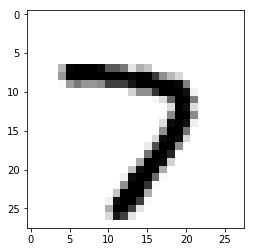

In [120]:
import matplotlib.pyplot as plt
image = X_test[num].reshape([28,28])
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

In [50]:
glorot_model = create_model("glorot_normal")
glorot_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
glorot_model.fit(X_train_reshaped, Y_train_cat, batch_size=64, nb_epoch=30, verbose=1, validation_data=(X_test_reshaped, Y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 69us/step - loss: 2.2876 - acc: 0.1377 - val_loss: 2.2673 - val_acc: 0.1707
Epoch 2/30
60000/60000 [==============================] - 4s 63us/step - loss: 2.2411 - acc: 0.2072 - val_loss: 2.2059 - val_acc: 0.2360
Epoch 3/30
60000/60000 [==============================] - 5s 81us/step - loss: 2.1624 - acc: 0.2685 - val_loss: 2.1117 - val_acc: 0.2804
Epoch 4/30
60000/60000 [==============================] - 5s 81us/step - loss: 2.0499 - acc: 0.3091 - val_loss: 1.9881 - val_acc: 0.3217
Epoch 5/30
60000/60000 [==============================] - 4s 70us/step - loss: 1.9268 - acc: 0.3370 - val_loss: 1.8797 - val_acc: 0.3470
Epoch 6/30
60000/60000 [==============================] - 4s 70us/step - loss: 1.8340 - acc: 0.3590 - val_loss: 1.8078 - val_acc: 0.3643
Epoch 7/30
60000/60000 [==============================] - 4s 65us/step - loss: 1.7754 - acc: 0.3768 - val_loss: 1.7632 - val_acc